## Ejemplo 1: Anotando gráficas

### 1. Objetivos:
    - Aprender a añadir títulos, anotaciones y leyendas a nuestras gráficas
    - Aprender a cambiar los tamaños de nuestras gráficas y modificar la dirección de nuestros tics
 
---
    
### 2. Desarrollo:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Vamos a aprender a añadir anotaciones a nuestras gráficas para que sean mucho más comprensibles.

Graficas de densidad  
Displot: variedad de gráficas 
kdeplot: 

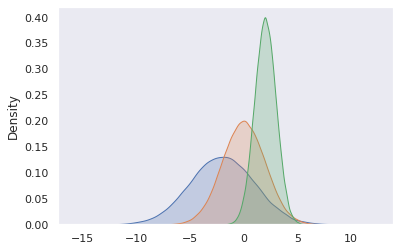

In [42]:
normal_1 = np.random.normal(loc=-2, scale=3, size=100000 )
normal_2 = np.random.normal(loc=0, scale=2, size=100000)
normal_3 = np.random.normal(loc=2, scale=1, size=100000)
sns.kdeplot(normal_1, fill=True);
sns.kdeplot(normal_2, fill=True);
sns.kdeplot(normal_3, fill=True)

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style='white')

In [48]:
df = pd.read_csv('/content/drive/MyDrive/BEDU/Remoto Datasets/Remoto athlete_olympic_events-clean.csv', 
                 index_col="athlete_id")

df.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None


In [52]:
#Unir  las columnas que sean del mismo atleta
por_atleta = df.groupby(level=0)[["age", "height", "weight","sex"]].max()
por_atleta.head()

,age,height,weight,sex
athlete_id,,,,
1,24.0,180.0,80.0,M
2,23.0,170.0,60.0,M
5,27.0,185.0,82.0,F
6,33.0,188.0,75.0,M
7,33.0,183.0,72.0,M


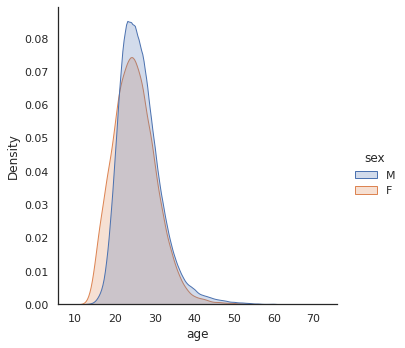

In [63]:
sns.displot(data=por_atleta, x="age", hue="sex", kind="kde", 
            common_norm=False, fill=True)
#common_norm es para normalizar los datos de acuerdo a la cantidad de datos disponibles

Añadir títulos y nombres para nuestros ejes es tan fácil como llamar el método `set`. Anteriormente habíamos estado llamando nuestros métodos de Seaborn sin asignar los resultados a ninguna variable. Si asignamos nuestro resultado a la variable `ax`, podemos ahora llamar el método `set` de esa variable para anotar nuestra gráfica:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


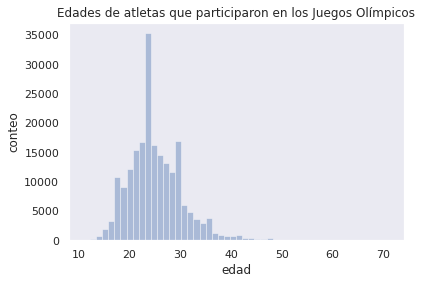

In [43]:
ax = sns.distplot(df['age'], kde=False, norm_hist=False)
ax.set(title='Edades de atletas que participaron en los Juegos Olímpicos', xlabel='edad', ylabel='conteo');

[Text(0, 0.5, 'conteo'),
 Text(0.5, 0, 'edad'),
 Text(0.5, 1.0, 'edades de atletas')]

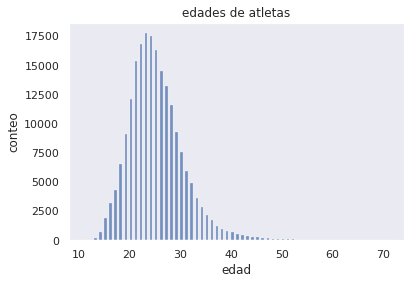

In [44]:
ax = sns.histplot(df['age'], binwidth=0.5)#binwidth=1, bins=50
ax.set(title="edades de atletas", xlabel="edad", ylabel="conteo") #Set es una funcion de matplotlib

Observa que he colocado un punto y coma al final de la última línea. Esto se hace para que Jupyter Notebooks no me muestre el output de la última línea, ya que esto ensuciaría un poco mi visualización.

En el caso de que tengamos dos o más gráficas (o categorías) al mismo tiempo, podemos añadir una leyenda a nuestra gráfica para poder diferenciar nuestros datos:

In [ ]:
by_athlete = df.groupby(level=0)[['age', 'height', 'weight']].mean()
sex = df.groupby(level=0)['sex'].last()
merged = by_athlete.merge(sex, left_index=True, right_index=True)
males = by_athlete[merged['sex'] == 'M']
females = by_athlete[merged['sex'] == 'F']

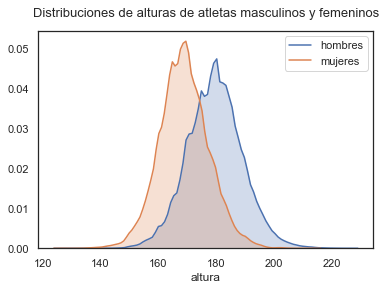

In [ ]:
ax = sns.distplot(males['height'], hist=False, kde_kws = {'shade': True}, label='hombres')
sns.distplot(females['height'], hist=False, kde_kws = {'shade': True}, ax=ax, label='mujeres')
ax.set_title('Distribuciones de alturas de atletas masculinos y femeninos', fontsize=13, pad=15);
ax.set(xlabel='altura');
ax.legend(loc='upper right');

En la gráfica anterior usamos el método `set_title` en vez del genérico `set` para poder agregar el tamaño de la letra (`fontsize`) y el tamaño de la separación entre el título y la gráfica (`pad`).

---

También podemos cambiar el tamaño de nuestras gráficas. Para eso tendremos que echar mano de la librería sobre la cual está construida `seaborn`: `matplotlib`. `matplotlib` es la librería de visualizaciones en Python más conocida y utilizada. Algunas de las nuevas librerías que son muy famosas, como `seaborn` están construidas sobre `matplotlib`. Esto quiere decir que para poder acceder a todo el poder de las visualizaciones en Python es importante saber cómo funcionan ambas.

Por ahora sólo vamos a ver lo siguiente:

Cada vez que creas una nueva gráfica con `seaborn`, esta gráfica está contenida dentro de algo que llamamos `figures` en `matplotlib`. Una `figure` puede contener múltiples gráficas. Cada que generas una gráfica con `seaborn`, una nueva `figure` se genera automáticamente. Podemos generar manualmente la `figure` para después utilizarla para personalizar nuestra gráfica. Para determinar el tamaño de nuestra gráfica podemos hacer lo siguiente:

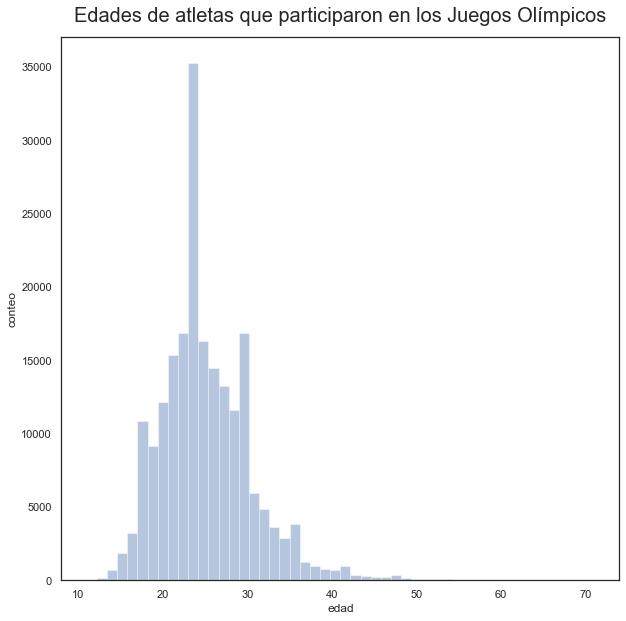

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = sns.distplot(df['age'], kde=False, norm_hist=False)
ax.set_title('Edades de atletas que participaron en los Juegos Olímpicos', fontsize=20, pad=15)
ax.set(xlabel='edad', ylabel='conteo');

A través de todo el módulo, iremos poco a poco viendo cómo modificar nuestras gráficas para que se vean bien y sean más comprensibles.